# EDA  Household Power Consumption

In [45]:
# load libraries
# %pip install numpy pandas matplotlib seaborn

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# load dataset

df = pd.read_csv('../data/household_power_consumption.txt', 
                sep=';',
                low_memory=False)


In [47]:
# first entries
df.head()  

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [48]:
# print number of rows and columns
print(f"Number of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}")

Number of rows: 2075259
Number of columns: 9


In [49]:
# info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [50]:
import importlib
import sys
sys.path.append('../')
from src import processing
importlib.reload(processing)

df_cleaned = processing.clean_data(df)
df_cleaned.head()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


# Univariate analysis

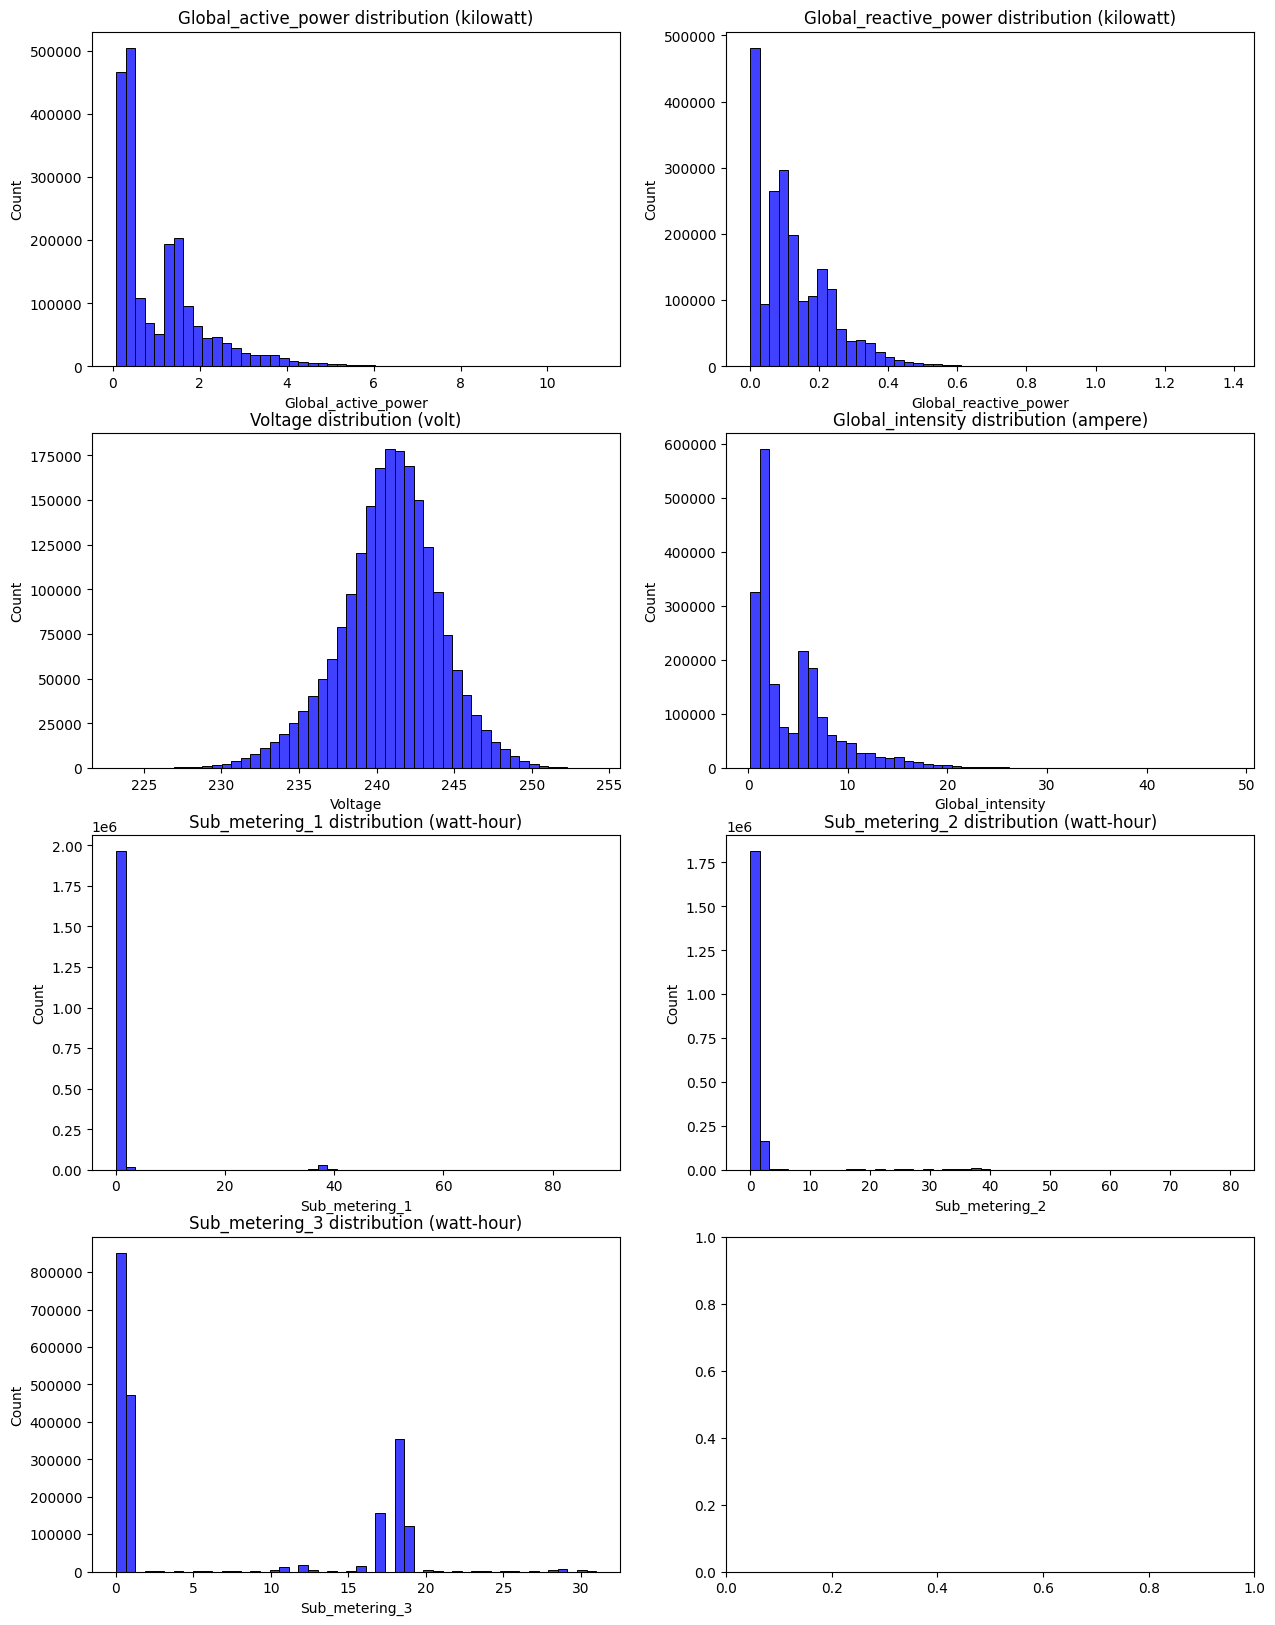

In [51]:

# 1. HISTPLOTS
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()

cols = df_cleaned.copy()
cols = cols.columns.drop("Datetime")
measure_units = ["kilowatt", "kilowatt", "volt", "ampere", "watt-hour", "watt-hour", "watt-hour"]

for i, col in enumerate(cols):
    sns.histplot(
        df_cleaned[col], 
        color="blue", 
        label=col, 
        bins=50, 
        ax=axes[i],
    )
    
    # title
    axes[i].set_title(f"{col} distribution ({measure_units[i]})", fontsize=12)


# Time analysis


In [52]:
# Set index with datetime
df_cleaned = df_cleaned.set_index('Datetime')

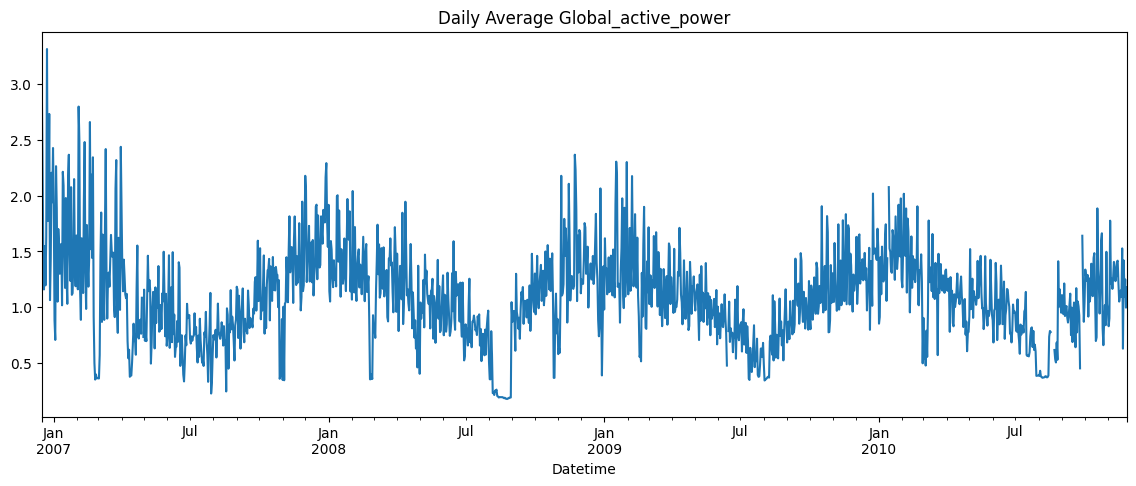

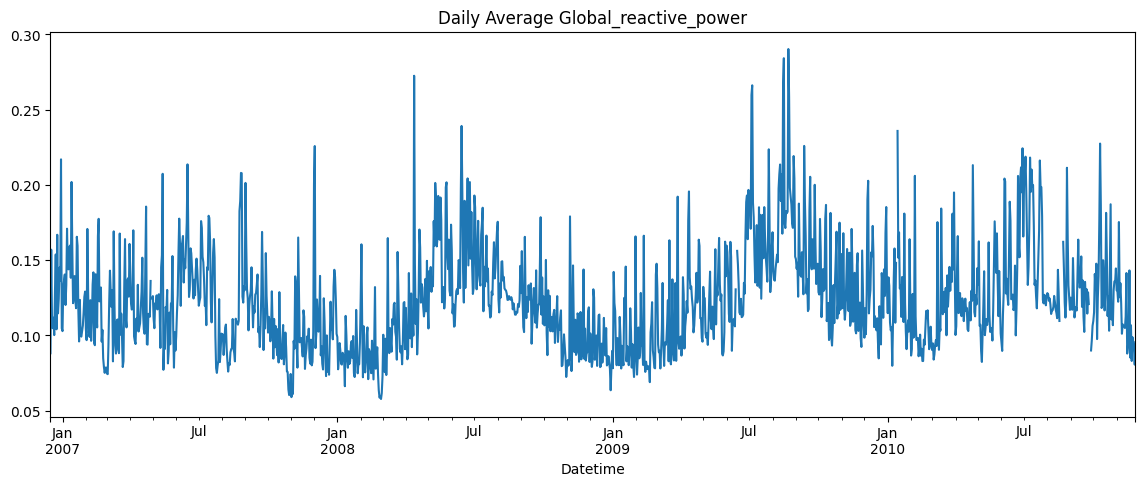

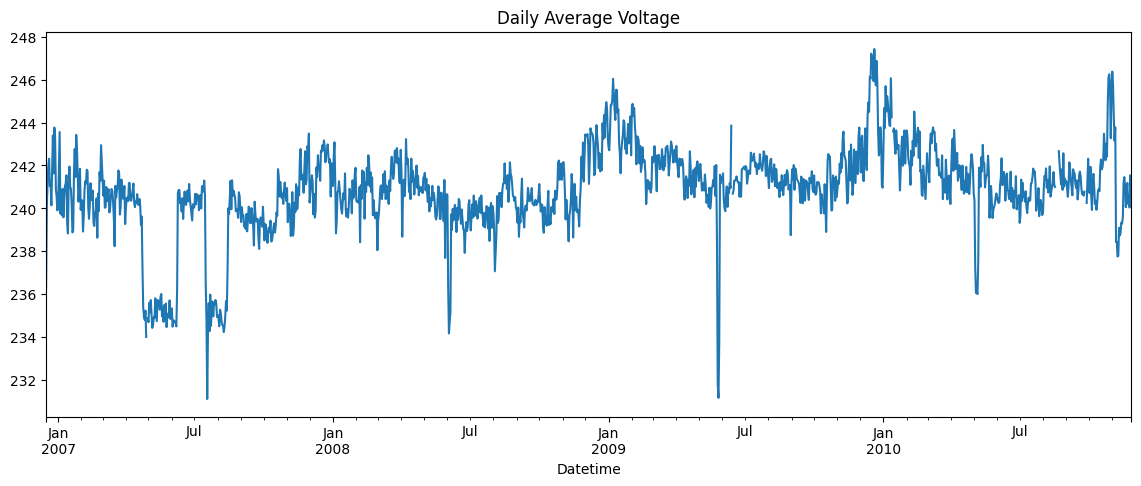

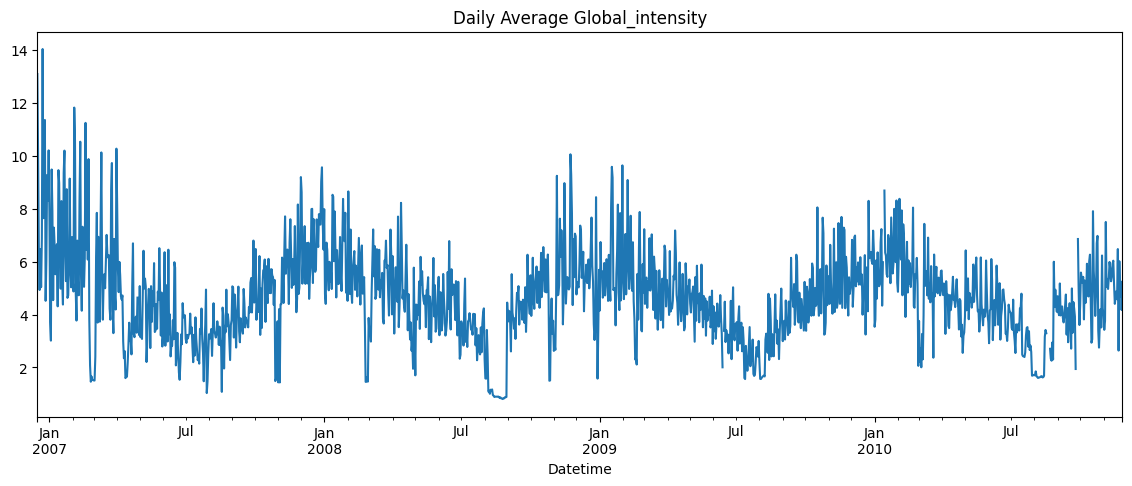

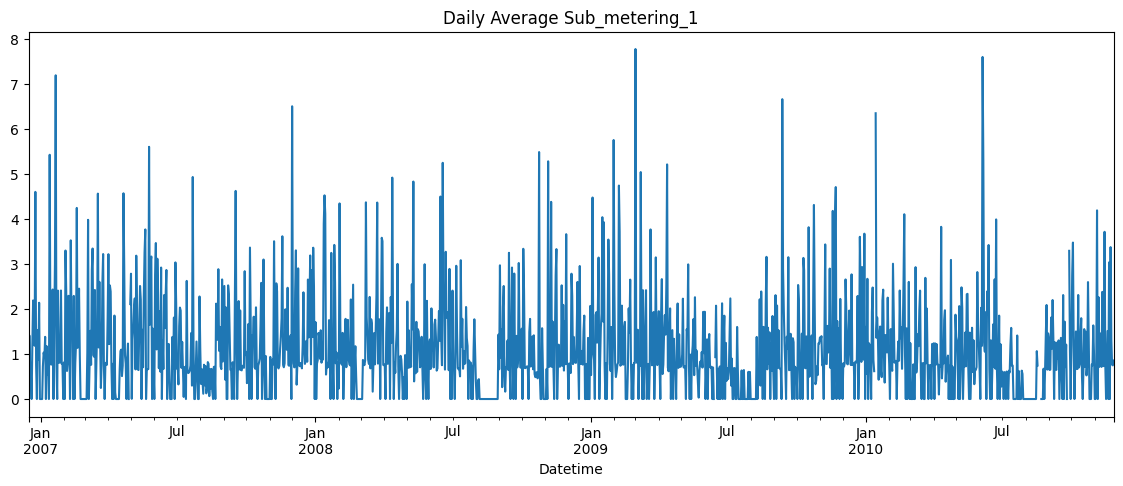

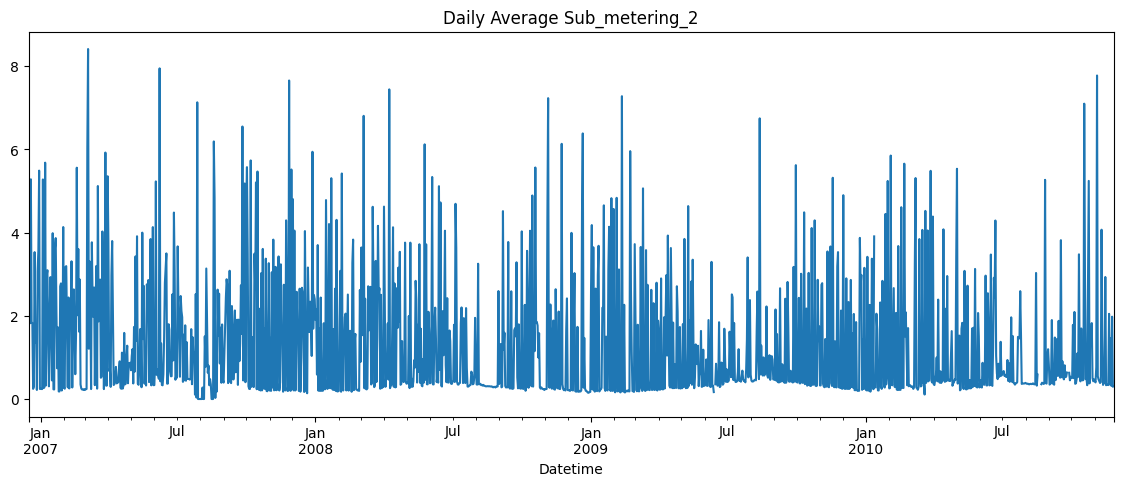

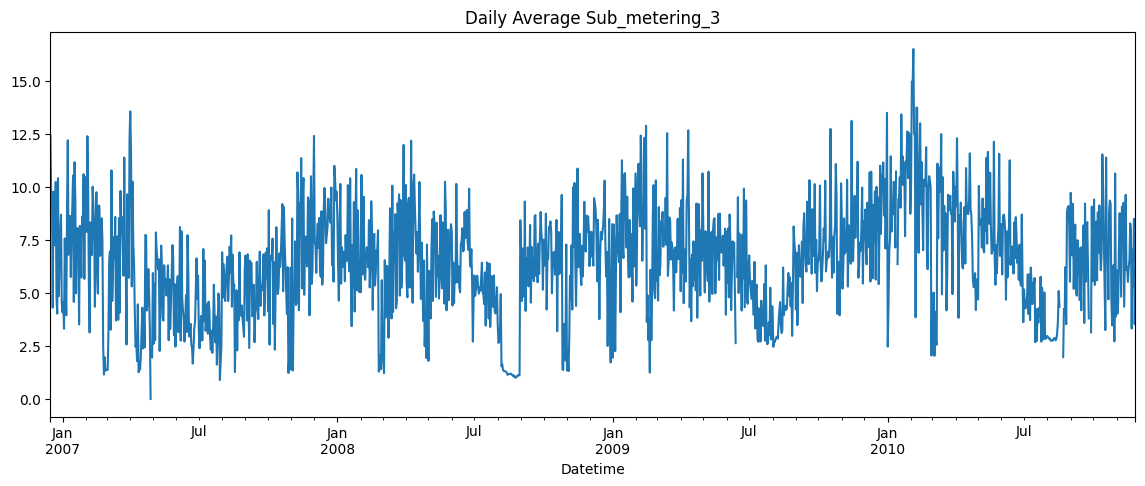

In [78]:
hourly = df_cleaned.resample('d').mean()

for col in hourly.columns:
    hourly[col].plot(figsize=(14,5))
    plt.title(f"Daily Average {col}")
    plt.show()  



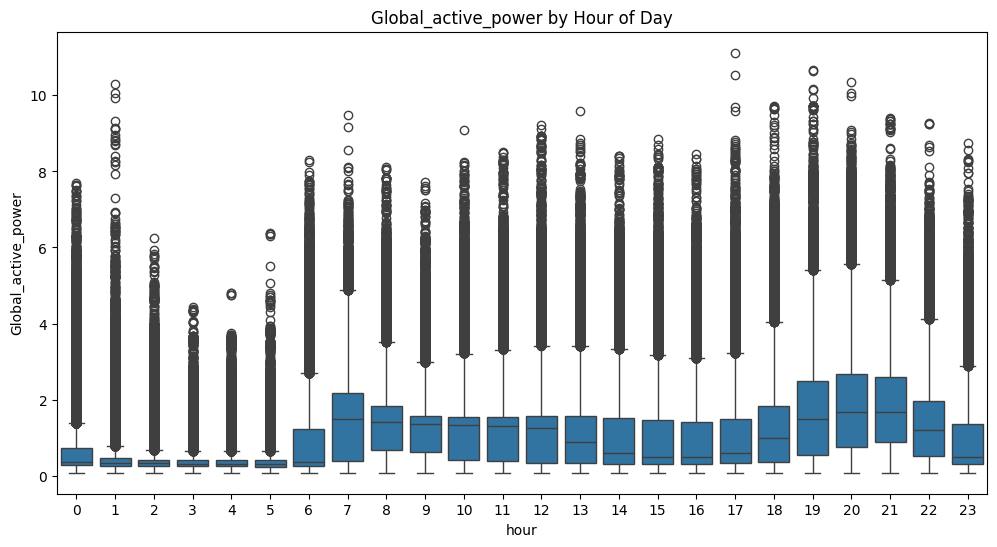

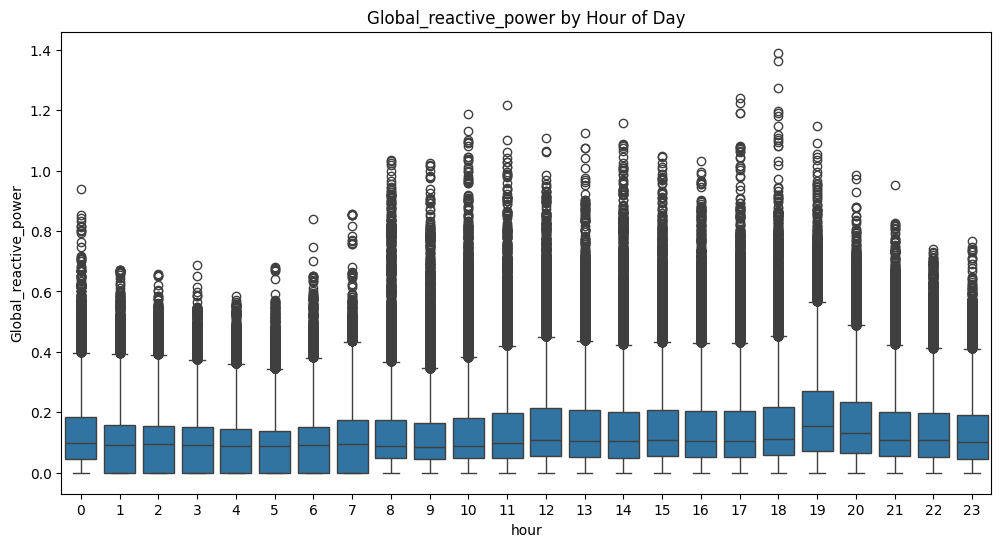

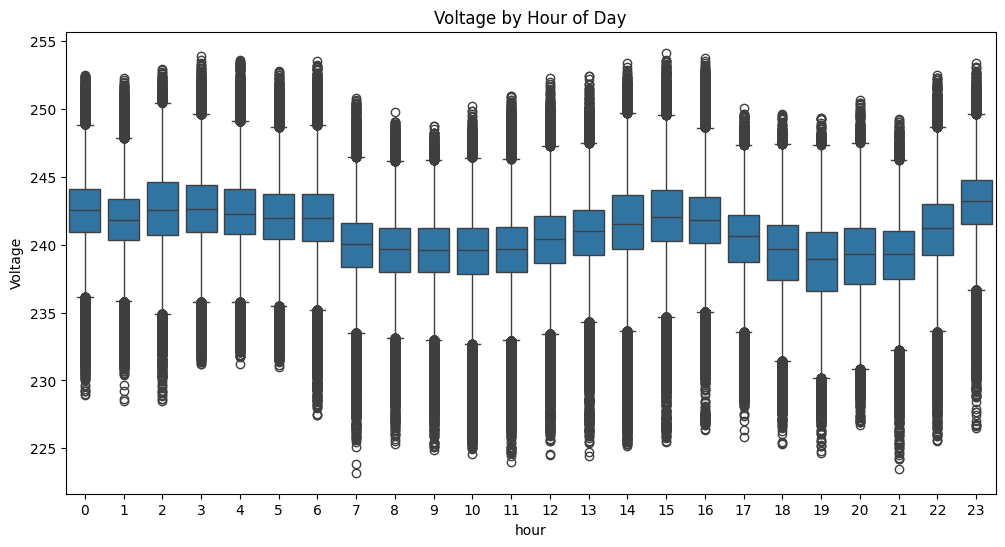

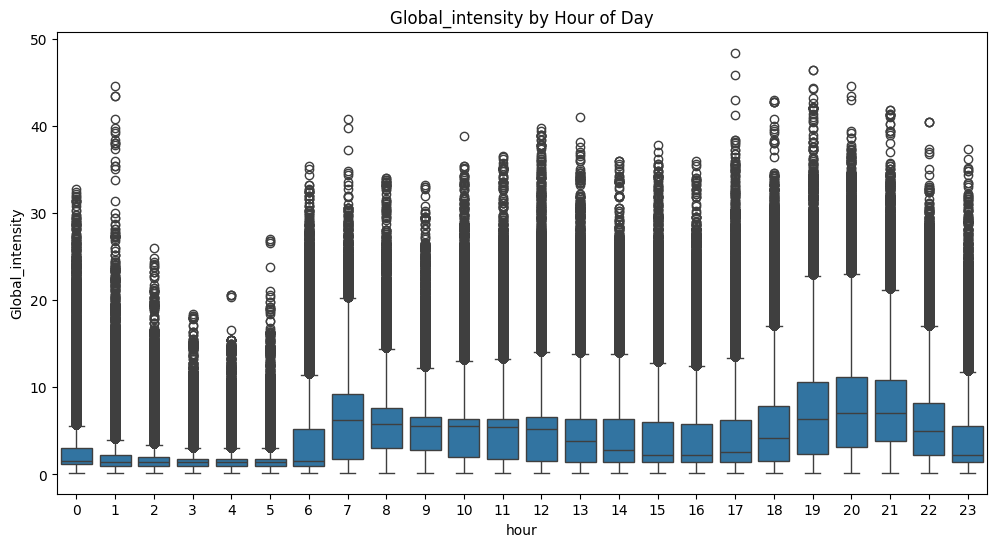

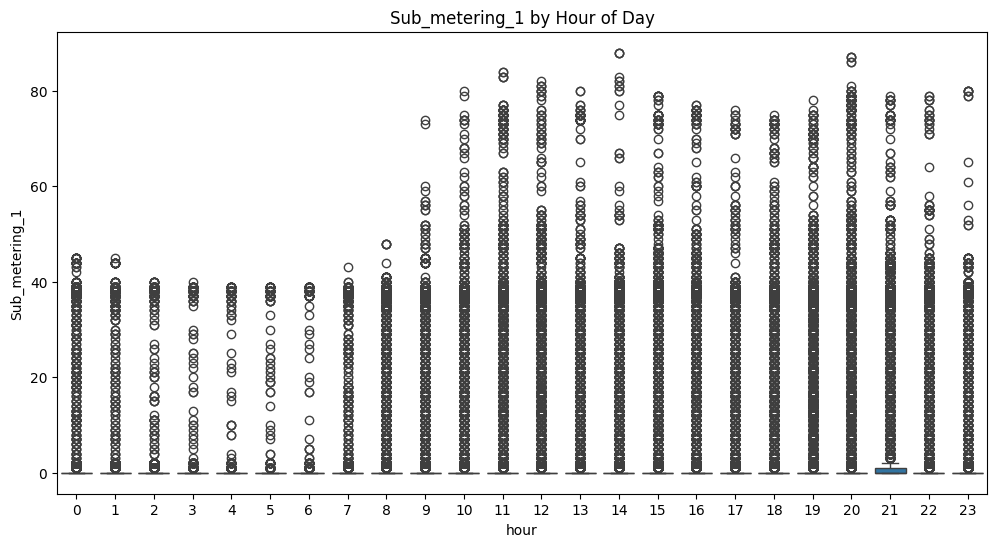

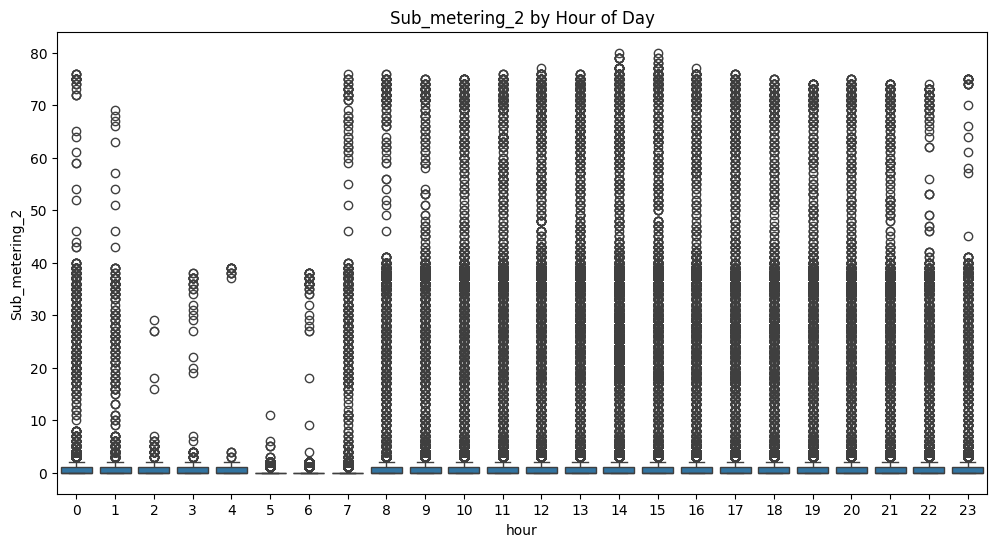

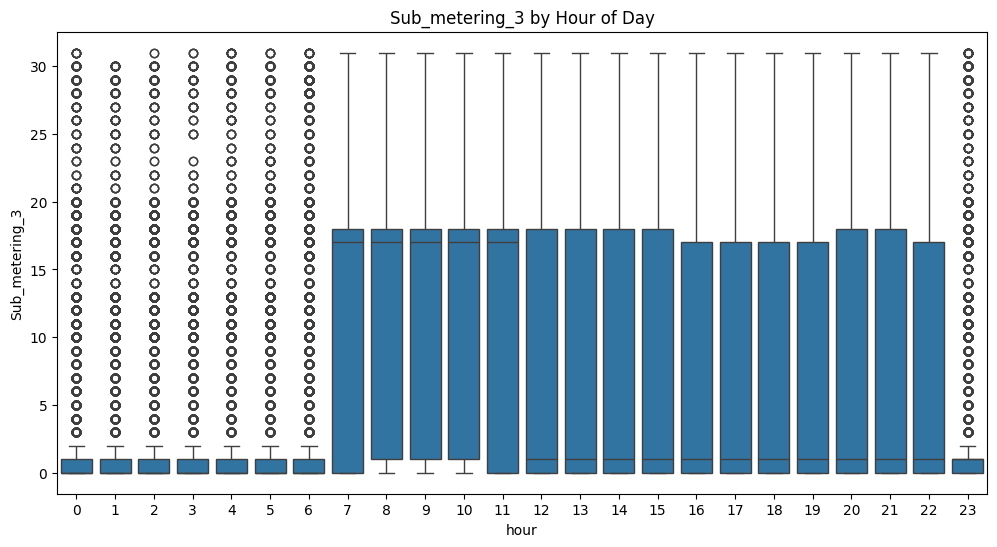

In [79]:
df_cleaned_2 = df_cleaned.copy()
df_cleaned_2["hour"] = df_cleaned_2.index.hour

for col in df_cleaned_2.columns:
    if col != "hour":
        plt.figure(figsize=(12,6))
        sns.boxplot(x="hour", y=col, data=df_cleaned_2)
        plt.title(f"{col} by Hour of Day")
        plt.show()